In [36]:
import numpy as np
import pandas as pd

data = pd.read_csv("dataset/steam_cleaned_cluster.csv")
cleanData = pd.read_csv("dataset/steam_cleaned.csv")
data

,Unnamed: 0.1,Unnamed: 0,name,genres,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,...,categories_Local Co-op,categories_MMO,categories_VR Support,categories_Mods,categories_Mods (require HL2),categories_Steam Turn Notifications,age,Top10,appid,cluster
0,0,10,Counter-Strike: Source,Action,147,76640,3497,6842,400,15000000,...,0,0,0,0,0,0,7000,"['action', 'fps', 'multiplayer', 'shooter', 't...",10,cluster_1
1,1,20,Left 4 Dead,Action,73,17951,948,897,278,7500000,...,0,0,0,0,0,0,5523,"['action', 'fps', 'multiplayer', 'shooter', 'c...",20,cluster_1
2,2,30,Darwinia,Indie;Strategy,0,472,158,182,273,750000,...,0,0,0,0,0,0,6745,"['fps', 'multiplayer', 'action', 'shooter', 'w...",30,cluster_1
3,3,40,Arx Fatalis,RPG,0,671,106,11,21,150000,...,0,0,0,0,0,0,6117,"['action', 'fps', 'multiplayer', 'shooter', 'a...",40,cluster_5
4,4,50,DOOM II,Action,0,2517,182,90,78,750000,...,0,0,0,0,0,0,5995,"['fps', 'action', 'singleplayer', 'shooter', '...",50,cluster_5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597,597,26800,Brood,Adventure;Casual;Indie;Early Access,0,6,1,0,0,10000,...,0,0,0,0,0,0,1735,"['appid', '2d', 'singleplayer', 'great_soundtr...",26800,cluster_5
598,598,26900,Helltower,Action;Adventure;Indie,12,2,0,0,0,10000,...,0,0,0,0,0,0,1742,"['appid', 'physics', 'singleplayer', '2d', 'sa...",26900,cluster_2
599,599,27000,Pixel Art Monster - Color by Number,Action;Adventure;Casual;Indie;RPG;Simulation;S...,0,3,0,0,0,10000,...,0,0,0,0,0,0,1734,"['appid', 'horror', 'exploration', 'adventure'...",27000,cluster_5
600,600,27020,Erannorth Reborn,RPG;Early Access,25,6,2,0,0,10000,...,0,0,0,0,0,0,1722,"['appid', 'atmospheric', 'simulation', 'single...",27020,cluster_3


# We dropped numerical values that does not mean anyting so to remove the noise such as Unnamed and appid
We also log the value of owners to make it easier to calculate

In [37]:
data = data.drop(columns=["Unnamed: 0","appid","Unnamed: 0.1"])
data_num = data.select_dtypes(include=np.number)
data_num["owners"] = np.log10(data_num["owners"])
data_num


In [38]:
from sklearn.model_selection import train_test_split

data_x = data_num.drop(columns="average_playtime")
data_y = data_num[["average_playtime"]]
x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, random_state=1234567)
print("Train input shape:", x_train.shape)
print("Test input shape:", x_test.shape)

Train input shape: (451, 36)
Test input shape: (151, 36)


In [11]:
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, HistGradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import permutation_test_score
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)
y_scaler = StandardScaler()
y_train_scaled = y_scaler.fit_transform(y_train)
y_test_scaled = y_scaler.transform(y_test)
y_train_arr = y_train_scaled.ravel()
y_test_arr = y_test_scaled.ravel()

def evaluate(name, model, perm=20):
    print("===", name, "===")
    score = permutation_test_score(model, x_train_scaled, y_train_arr, n_permutations=perm)
    print(f"Score: {score[0]:.2f} (p-value {score[2]:.3f})")
    print(f"               Best: {1/(perm+1):.3f}")
    print()

print()

evaluate("Dummy Regressor (Baseline)", DummyRegressor())
evaluate("Linear Regression", LinearRegression())
evaluate("Decision Tree", DecisionTreeRegressor(random_state=0))
evaluate("Random Forest", RandomForestRegressor(random_state=0, max_samples=0.5), perm=10)
evaluate("Boosting Regressor", HistGradientBoostingRegressor(random_state=0), perm=5)
evaluate("Multi-layer Perceptron", MLPRegressor(random_state=0, solver="adam",hidden_layer_sizes=[100], max_iter=2000), perm=3)


=== Dummy Regressor (Baseline) ===
Score: -0.16 (p-value 0.667)
               Best: 0.048

=== Linear Regression ===
Score: -1975853576732479238176768.00 (p-value 0.190)
               Best: 0.048

=== Decision Tree ===
Score: 0.22 (p-value 0.048)
               Best: 0.048

=== Random Forest ===
Score: 0.47 (p-value 0.091)
               Best: 0.091

=== Boosting Regressor ===
Score: -1.92 (p-value 1.000)
               Best: 0.167

=== Multi-layer Perceptron ===
Score: 0.34 (p-value 0.250)
               Best: 0.250



In [39]:
data = cleanData.select_dtypes(include=np.number)
data["owners"] = np.log10(data_num["owners"])
data.to_csv('new.csv', index=False)
data

,achievements,average_playtime,median_playtime,owners,price,categories_Multi-player,categories_Online Multi-Player,categories_Local Multi-Player,categories_Valve Anti-Cheat enabled,categories_Single-player,...,steamspy_tags_Mod,steamspy_tags_Faith,steamspy_tags_Time Attack,steamspy_tags_2.5D,steamspy_tags_Blood,steamspy_tags_NSFW,steamspy_tags_Stylized,steamspy_tags_Logic,age,positive_ratio
0,0,17612,317,0.855888,7.19,1,1,1,1,0,...,0,0,0,0,0,0,0,0,8461,0.973888
1,0,277,62,0.837277,3.99,1,1,1,1,0,...,0,0,0,0,0,0,0,0,9041,0.839787
2,0,187,34,0.769012,3.99,1,0,0,1,0,...,0,0,0,0,0,0,0,0,7550,0.895648
3,0,258,184,0.714002,3.99,1,1,1,1,0,...,0,0,0,0,0,0,0,0,8249,0.826623
4,0,624,415,0.769012,3.99,1,0,0,1,1,...,0,0,0,0,0,0,0,0,8827,0.947996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15283,12,0,0,NaN,7.19,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1721,0.714286
15284,7,0,0,NaN,0.00,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1721,0.846939
15285,0,0,0,NaN,0.00,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1726,0.776923
15286,23,0,0,NaN,6.10,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1718,0.733333


In [42]:
from sklearn.model_selection import train_test_split

data_x = data.drop(columns="average_playtime")
data_y = data[["average_playtime"]]
data_x = data_x.dropna(axis=1)
data_y = data_y.dropna(axis=1)
x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, random_state=1234567)
print("Train input shape:", x_train.shape)
print("Test input shape:", x_test.shape)

Train input shape: (11466, 373)
Test input shape: (3822, 373)


In [46]:
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, HistGradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import permutation_test_score
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)
y_scaler = StandardScaler()
y_train_scaled = y_scaler.fit_transform(y_train)
y_test_scaled = y_scaler.transform(y_test)
y_train_arr = y_train_scaled.ravel()
y_test_arr = y_test_scaled.ravel()

def evaluate(name, model, perm=20):
    print("===", name, "===")
    score = permutation_test_score(model, x_train_scaled, y_train_arr, n_permutations=perm)
    print(f"Score: {score[0]:.2f} (p-value {score[2]:.3f})")
    print(f"               Best: {1/(perm+1):.3f}")
    print()

print()

evaluate("Dummy Regressor (Baseline)", DummyRegressor())
evaluate("Linear Regression", LinearRegression())
evaluate("Decision Tree", DecisionTreeRegressor(random_state=0))
evaluate("Boosting Regressor", HistGradientBoostingRegressor(random_state=0), perm=5)
evaluate("Multi-layer Perceptron", MLPRegressor(random_state=0, solver="adam"), perm=3)
evaluate("Random Forest", RandomForestRegressor(random_state=0, max_samples=0.5,max_depth=15,n_estimators=100), perm=10)


=== Dummy Regressor (Baseline) ===
Score: -0.00 (p-value 0.143)
               Best: 0.048

=== Linear Regression ===
Score: -6261550702589111802265600.00 (p-value 0.190)
               Best: 0.048

=== Decision Tree ===
Score: 0.33 (p-value 0.048)
               Best: 0.048

=== Boosting Regressor ===
Score: 0.42 (p-value 0.167)
               Best: 0.167

=== Multi-layer Perceptron ===
Score: -2.55 (p-value 0.500)
               Best: 0.250

=== Random Forest ===
Score: 0.82 (p-value 0.091)
               Best: 0.091



In [47]:
data_num.corr().average_playtime.sort_values(ascending = False)

average_playtime                         1.000000
median_playtime                          0.668022
positive_ratings                         0.347307
categories_Includes Source SDK           0.271600
owners                                   0.265987
negative_ratings                         0.245254
categories_Valve Anti-Cheat enabled      0.168723
categories_Steam Cloud                   0.111512
categories_Steam Workshop                0.105476
age                                      0.102020
categories_Steam Trading Cards           0.099342
categories_Stats                         0.080372
categories_Steam Leaderboards            0.073138
categories_Co-op                         0.071689
price                                    0.065927
categories_Cross-Platform Multiplayer    0.060672
categories_Partial Controller Support    0.056077
categories_Captions available            0.042463
categories_Multi-player                  0.039535
categories_Includes level editor         0.039105


In [48]:
# absolute as negative coorelation is still coorelation
np.abs(data_num.corr().average_playtime).sort_values(ascending = False).head(15)

average_playtime                       1.000000
median_playtime                        0.668022
positive_ratings                       0.347307
categories_Includes Source SDK         0.271600
owners                                 0.265987
negative_ratings                       0.245254
categories_Valve Anti-Cheat enabled    0.168723
categories_Steam Cloud                 0.111512
categories_Steam Workshop              0.105476
age                                    0.102020
categories_Steam Trading Cards         0.099342
categories_Stats                       0.080372
categories_Single-player               0.077773
categories_Steam Leaderboards          0.073138
categories_Co-op                       0.071689
Name: average_playtime, dtype: float64

In [49]:
# Assuming df is your DataFrame
df = data_num

X = df.drop(df.columns[2], axis=1).values  #features

y = df.iloc[:,1:2].values  # Target variable
y = y.ravel()

Length of Feature array: 37
Length of Importance array: 36


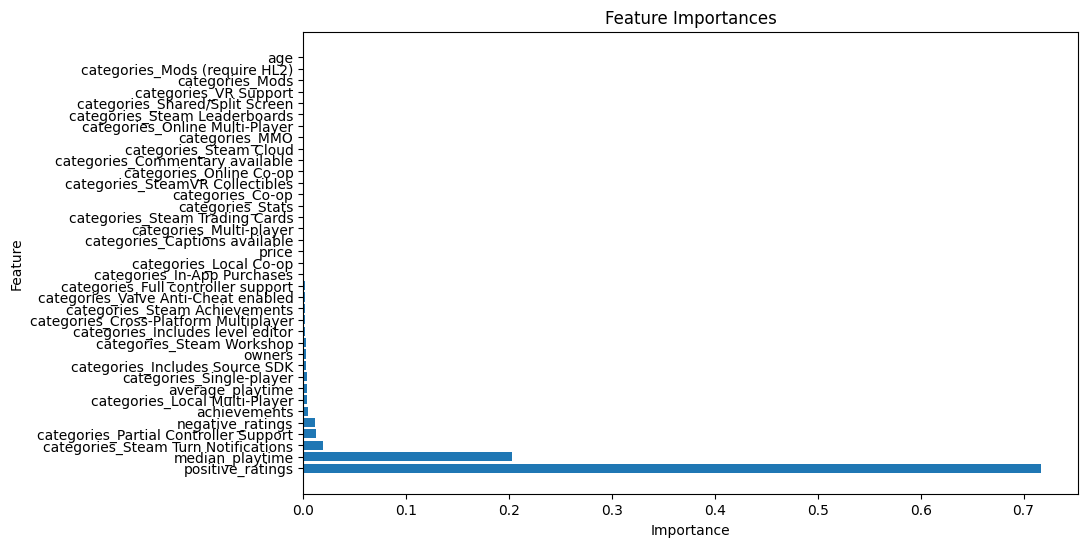

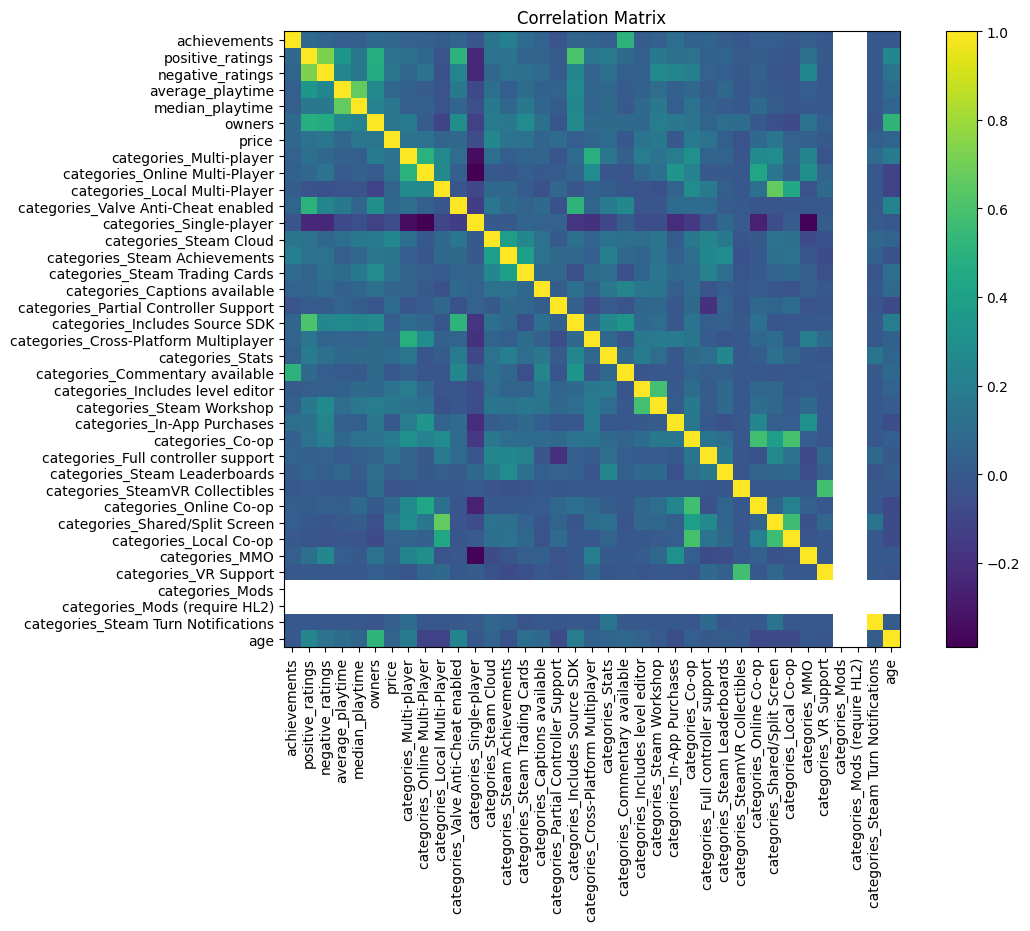

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor

from sklearn.preprocessing import LabelEncoder
 

from sklearn.model_selection import train_test_split

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the regressor
regressor = RandomForestRegressor(n_estimators=100, random_state=0, oob_score=True)

# Fit the regressor with training data
regressor.fit(x_train, y_train)

# Evaluate the model using the test set
y_pred = regressor.predict(x_test)

# Extract feature importances
feature_importances = regressor.feature_importances_

# Get feature names from your DataFrame or dataset
feature_names = df.columns
print("Length of Feature array:", len(feature_names))
print("Length of Importance array:", len(feature_importances))
# Add a default importance value for the missing feature
default_importance = 0.0
feature_importances = np.append(feature_importances, default_importance)

# Create a DataFrame to store feature importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance values
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)


# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

# Calculate correlation matrix
correlation_matrix = df.corr()

# Plot correlation matrix
plt.figure(figsize=(12, 8))
plt.imshow(correlation_matrix, cmap='viridis', interpolation='nearest')
plt.colorbar()
plt.title('Correlation Matrix')
plt.xticks(ticks=np.arange(len(df.columns)), labels=df.columns, rotation=90)
plt.yticks(ticks=np.arange(len(df.columns)), labels=df.columns)
plt.show()


In [ ]:
# Evaluating the model

from sklearn.metrics import mean_squared_error, r2_score
 
# Access the OOB Score

oob_score = regressor.oob_score_

print(f'Out-of-Bag Score: {oob_score}')
 
# Making predictions on the same data or new data

predictions = regressor.predict(x)
 
# Evaluating the model

mse = mean_squared_error(y, predictions)

print(f'Mean Squared Error: {mse}')
 

r2 = r2_score(y, predictions)

print(f'R-squared: {r2}')

In [6]:
# Extract feature importances
feature_importances = regressor.feature_importances_

# Get feature names from your DataFrame or dataset
feature_names = df.columns

# Create a DataFrame to store feature importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance values
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

# Calculate correlation matrix
correlation_matrix = df.corr()

# Plot correlation matrix
plt.figure(figsize=(12, 8))
plt.imshow(correlation_matrix, cmap='viridis', interpolation='nearest')
plt.colorbar()
plt.title('Correlation Matrix')
plt.xticks(ticks=np.arange(len(df.columns)), labels=df.columns, rotation=90)
plt.yticks(ticks=np.arange(len(df.columns)), labels=df.columns)
plt.show()

NameError: name 'y_pred' is not defined

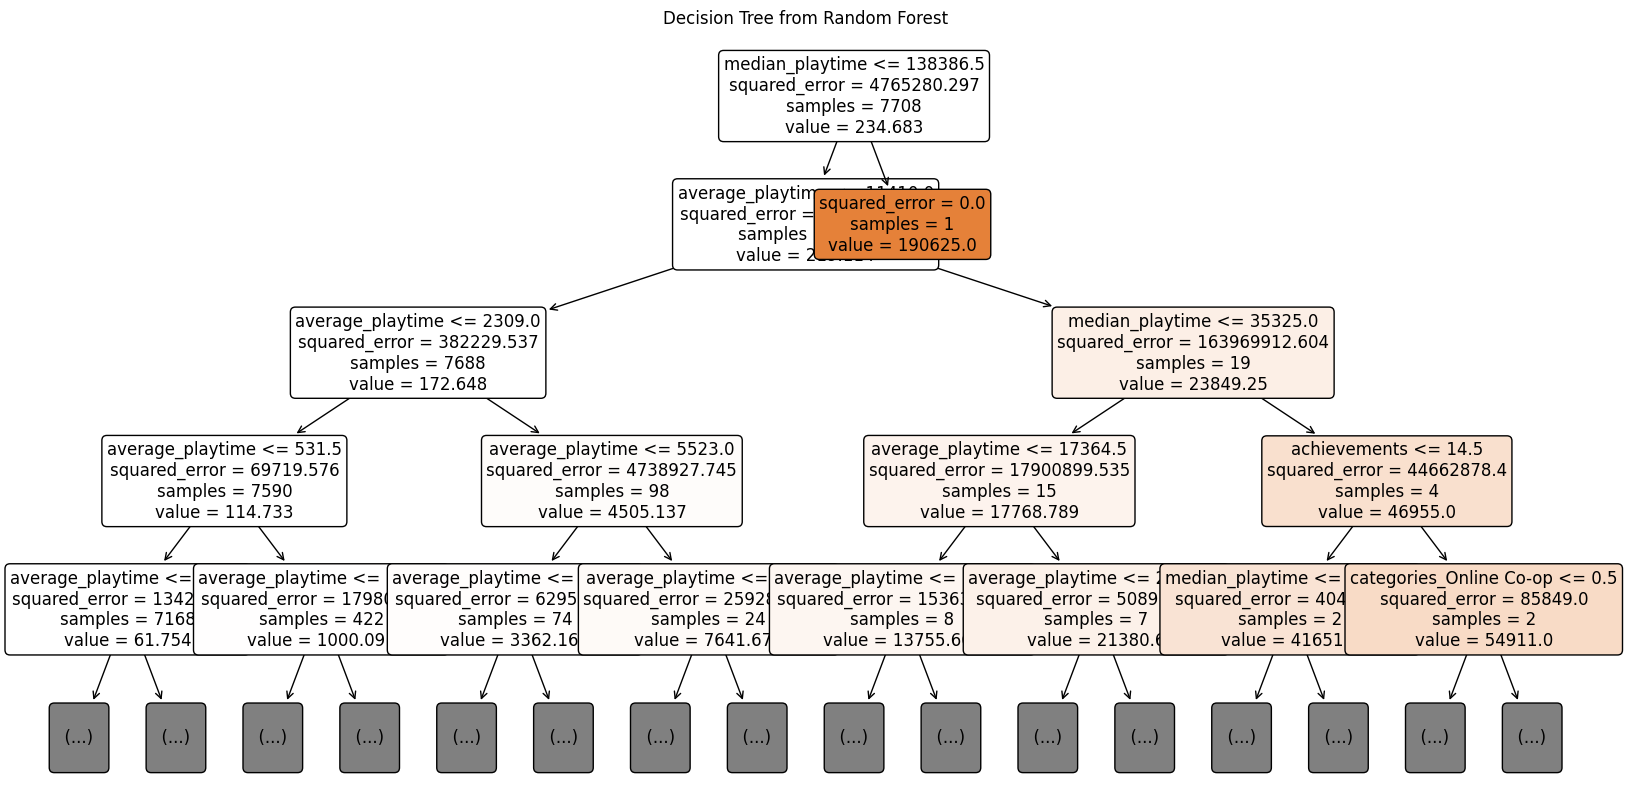